# EVALUATING TESLA STOCK PRICES


In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
#checking for datatype of each column, total number of columns and if there are null values in any column
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [5]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [6]:
#changing date time format to 
tesla['Date'] = pd.to_datetime(tesla['Date'])


In [7]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} to {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 to 2020-02-03 00:00:00
Total days = 3506 days


<Axes: >

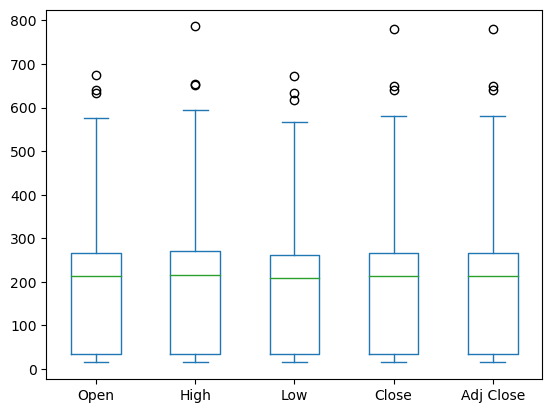

In [8]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [9]:
# Builing the regression model
from sklearn.model_selection import train_test_split #to split data into traing and testing

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for model Evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [10]:
#split data into training and testing
x = np.array(tesla.index).reshape(-1,1) #x variable has the independent variables/features
y = tesla['Close'] #y variable has the target variable or the dependent variable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=101) #test size=0.3 means 30%

In [11]:
# Feature scaling
scaler = StandardScaler().fit(x_train)

In [12]:
#creating a linear regression model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train) #used to train data

LinearRegression()

In [13]:
#plot actual and preicted values for train datadet
trace0 = go.Scatter(
    x = x_train.T[0],
    y = y_train,
    mode = 'markers',
    name ='Actual'
)
trace1 = go.Scatter(
    x = x_train.T[0],
    y = reg.predict(x_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
plot2 = go.Figure(data=tesla_data)
iplot(plot2)

In [14]:
#calculate scores for madel evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, reg.predict(x_train))}\t{r2_score(y_test, reg.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train, reg.predict(x_train))}\t{mse(y_test,reg.predict(x_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.788228331751714	0.8024543287892049
MSE       3018.796360995388	2768.704187535219

